# WeatherPy
#### By: Anis Ali
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='

#Define values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Looping through cities for API calls
count = 1
for city in cities:
    city = city
    qry_url = url + city + '&units=imperial&appid=' + weather_api_key
    response = requests.get(qry_url).json()
    
# Try and except for API calls
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {count}: {city}")
        count = count + 1
    except (KeyError):
        print("City not found. Skipping...")

Processing record 1: busselton
Processing record 2: leningradskiy
Processing record 3: swan river
Processing record 4: saint-philippe
Processing record 5: tiksi
Processing record 6: carnarvon
Processing record 7: jamestown
Processing record 8: san rafael
Processing record 9: severo-kurilsk
Processing record 10: rikitea
Processing record 11: chokurdakh
Processing record 12: thinadhoo
Processing record 13: punta arenas
Processing record 14: vaini
Processing record 15: bredasdorp
Processing record 16: chuy
Processing record 17: komsomolskiy
Processing record 18: arraial do cabo
City not found. Skipping...
Processing record 19: atar
City not found. Skipping...
City not found. Skipping...
Processing record 20: puerto ayora
Processing record 21: grand gaube
Processing record 22: luderitz
Processing record 23: ust-ishim
Processing record 24: lompoc
Processing record 25: kendari
Processing record 26: nikolskoye
Processing record 27: mount pleasant
Processing record 28: mataura
Processing recor

Processing record 243: kushima
Processing record 244: murdochville
Processing record 245: plettenberg bay
Processing record 246: mukhen
Processing record 247: moose factory
Processing record 248: tena
Processing record 249: vanavara
Processing record 250: kerema
Processing record 251: puerto escondido
Processing record 252: warrington
Processing record 253: honiara
Processing record 254: meulaboh
City not found. Skipping...
Processing record 255: verkhnevilyuysk
Processing record 256: victor harbor
Processing record 257: darhan
Processing record 258: barra do corda
Processing record 259: souillac
Processing record 260: pokrovsk
Processing record 261: saint-jovite
Processing record 262: izmit
Processing record 263: kryvyy rih
Processing record 264: cayenne
Processing record 265: constitucion
Processing record 266: adrar
Processing record 267: talara
Processing record 268: lasa
Processing record 269: banda aceh
Processing record 270: sosua
Processing record 271: peshkovo
Processing recor

Processing record 476: torit
Processing record 477: sainte-marie
Processing record 478: beirut
Processing record 479: teguise
Processing record 480: nassau
Processing record 481: hay river
Processing record 482: la asuncion
Processing record 483: domoni
City not found. Skipping...
Processing record 484: ust-maya
Processing record 485: mwense
Processing record 486: inyonga
Processing record 487: kushmurun
Processing record 488: urumqi
Processing record 489: el higo
Processing record 490: atmakur
Processing record 491: belaya gora
Processing record 492: thunder bay
Processing record 493: egtved
City not found. Skipping...
Processing record 494: saint-augustin
Processing record 495: luganville
Processing record 496: acajutla
Processing record 497: vila franca do campo
Processing record 498: okato
Processing record 499: tuy hoa
Processing record 500: bignona
Processing record 501: leeton
Processing record 502: zemio
Processing record 503: inhambane
Processing record 504: novikovo
Processin

### Convert Raw Data to DataFrame

In [7]:
# Export the city data into a .csv.
# Display the DataFrame

weather_df = pd.DataFrame({
                        "City":city_name, 
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country, 
                        "Date":date
                        })
                        
#Exporting data to csv
weather_df.to_csv("Resources/Cities.csv")

#Displaying dataframe
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,61.00,83,61,10.65,AU,1603751202
1,Leningradskiy,69.38,178.42,26.98,98,100,11.27,RU,1603751245
2,Swan River,52.11,-101.27,20.80,91,71,11.25,CA,1603751417
3,Saint-Philippe,-21.36,55.77,71.60,78,48,4.70,RE,1603751417
4,Tiksi,71.69,128.87,6.37,94,99,6.62,RU,1603751418


In [8]:
weather_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

#### Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,17.368942,14.978713,59.002275,72.807760,53.428571,7.924568,1.603751e+09
std,34.003415,92.509685,20.628226,21.312169,39.712635,5.565376,1.188196e+02
min,-54.800000,-175.200000,-0.940000,2.000000,0.000000,0.270000,1.603751e+09
25%,-11.565000,-65.360000,46.400000,64.000000,7.500000,4.000000,1.603751e+09
50%,20.900000,20.040000,64.400000,79.000000,65.000000,6.350000,1.603751e+09
75%,47.585000,96.150000,75.455000,88.000000,90.500000,10.290000,1.603751e+09
max,78.220000,179.320000,89.600000,100.000000,100.000000,32.210000,1.603752e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

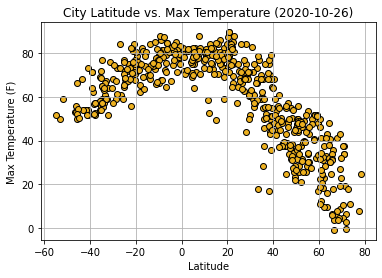

In [12]:
# Converting Date for title of plot
timestamp = weather_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Max Temp"],
            marker = "o", 
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({shortened_timestamp})")
plt.savefig("Output/Lat vs Temp Plot")
plt.show()

## Latitude vs. Humidity Plot

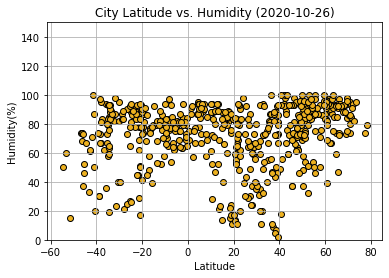

In [13]:
# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Humidity"],
            marker = "o",
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.ylim(0, weather_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("Output/Lat vs Humidity Plot")
plt.show()

## Latitude vs. Cloudiness Plot

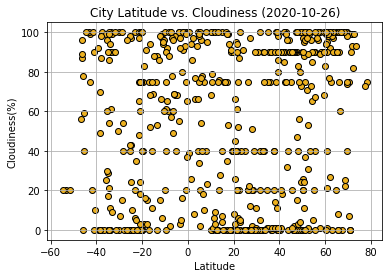

In [14]:
# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Cloudiness"],
            marker = "o",
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("Output/Lat vs Cloudiness Plot")
plt.show()

## Latitude vs. Wind Speed Plot

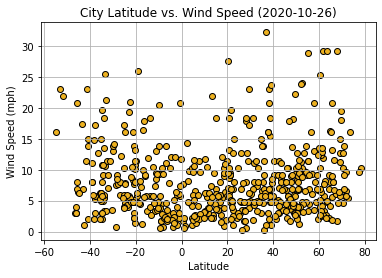

In [15]:
# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Wind Speed"],
            marker = "o",
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("Output/Lat vs Wind Speed Plot")
plt.show()

## Linear Regression

In [16]:
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7801089301142548


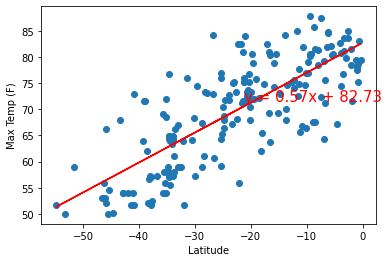

None


In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2499758778404691


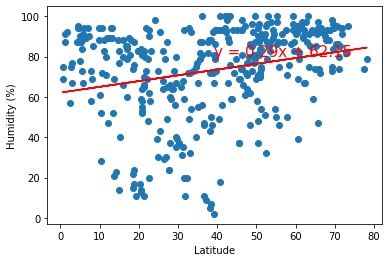

None


In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19076272760441182


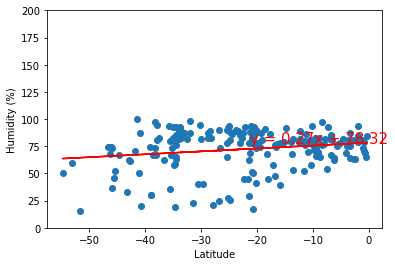

None


In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21865646011451126


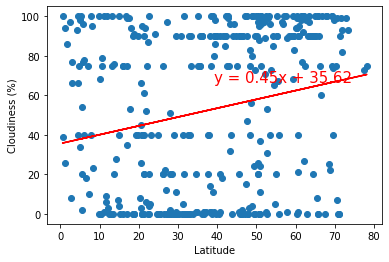

None


In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15753102227920665


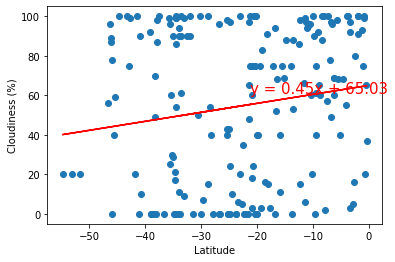

None


In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20431412494268741


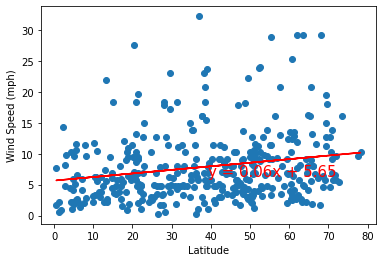

None


In [23]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24759187202344343


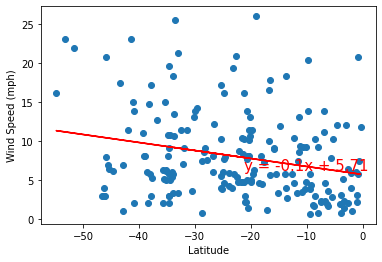

None


In [24]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg_plot(x_values,y_values))

In [25]:
# End